In [278]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

r=5
c=5
cnt=0

In [279]:
def build_filter(img):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), dtype=np.uint8)
    # create a circular low pass mask
    low_mask=cv2.circle(mask, (ccol, crow), 500, 1, thickness=-1)
    # create a high pass mask by subtracting low pass from 255
    h_mask=1-low_mask

    # create two circular masks
    mask_outer = np.zeros((rows, cols), dtype=np.uint8)
    mask_inner = np.zeros((rows, cols), dtype=np.uint8)

    # passes frequencies within r2
    r1 = 30
    r2 = 80
    mask_outer = cv2.circle(mask_outer, (ccol, crow), r2, 1, thickness=-1)
    # blocks frequencies within r1
    mask_inner = cv2.circle(mask_inner, (ccol, crow), r1, 1, thickness=-1)

    # creating band-pass mask : outer minus inner
    band_pass_mask = mask_outer - mask_inner
    return low_mask, h_mask, band_pass_mask


In [280]:
def build_frequency(image):
    # If you look at the structure of the code for an FFT algorithm, you'll often see that the function
    #  calls itself on smaller subsections of the data. This recursion is the core of the "fast" part of the FFT.
    # This recursive splitting is what changes the computational complexity from the slow O(N2) operation of a 
    # direct DFT calculation to the much faster O(NlogN) operation of the FFT.
    # Here 2 is used for image(2D)
    f=np.fft.fft2(image)
    dft_shift=np.fft.fftshift(f)
    return dft_shift

In [281]:
def load_image(path):
    img=cv2.imread(path,0)
    img=cv2.resize(img,(512,512))
    return img

In [282]:
def show(img,title):
    global cnt 
    cnt += 1
    plt.subplot(r,c,cnt)
    plt.imshow(np.abs(img), cmap='gray')
    plt.title(title)
    plt.axis('off')

In [283]:
def apply_filter(img, filter_masks,title):
    show(img, f"Input Image - {title}")
    dft_shift = build_frequency(img)
    magnitude_spectrum=10*np.log(np.abs(dft_shift))
    show(magnitude_spectrum, f"DFT Magnitude Spectrum")
    # apply mask and inverse DFT
    mask_names = ['Low Pass Filter', 'High Pass Filter', 'Band Pass Filter']
    for i,mask in enumerate(filter_masks):
        fshift = dft_shift * mask
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        show((img_back), f"{mask_names[i]}")
    
    return img_back

In [284]:
def low_cal(img_low1,img_low2,img_low3,img_low4,img_low5,filter_masks):
    plt.figure(figsize=(25, 18))
    apply_filter(img_low1,filter_masks,"Low Contrast Image 1")
    apply_filter(img_low2,filter_masks,"Low Contrast Image 2")
    apply_filter(img_low3,filter_masks,"Low Contrast Image 3")
    apply_filter(img_low4,filter_masks,"Low Contrast Image 4")
    apply_filter(img_low5,filter_masks,"Low Contrast Image 5")
    plt.tight_layout()
    plt.show()
    global cnt
    cnt=0


In [285]:
def high_cal(img_high1,img_high2,img_high3,img_high4,img_high5,filter_masks):
    plt.figure(figsize=(25, 18))
    apply_filter(img_high1,filter_masks,"High Contrast Image 1")
    apply_filter(img_high2,filter_masks,"High Contrast Image 2")
    apply_filter(img_high3,filter_masks,"High Contrast Image 3")
    apply_filter(img_high4,filter_masks,"High Contrast Image 4")
    apply_filter(img_high5,filter_masks,"High Contrast Image 5")
    plt.tight_layout()
    plt.show()
    global cnt
    cnt=0


In [286]:
def band_cal(img_band1,img_band2,img_band3,img_band4,img_band5,filter_masks):
    plt.figure(figsize=(25, 18))
    apply_filter(img_band1,filter_masks,"Band Contrast Image 1")
    apply_filter(img_band2,filter_masks,"Band Contrast Image 2")
    apply_filter(img_band3,filter_masks,"Band Contrast Image 3")
    apply_filter(img_band4,filter_masks,"Band Contrast Image 4")
    apply_filter(img_band5,filter_masks,"Band Contrast Image 5")
    plt.tight_layout()
    plt.show()

In [287]:
def main():
    path1="Image/low_contrast/1image.jpg"
    path2="Image/low_contrast/2image.jpg"
    path3="Image/low_contrast/3image.jpg"
    path4="Image/low_contrast/4image.jpg"
    path5="Image/low_contrast/5image.jpg"

    path6="Image/medium_contrast/image1.jpg"
    path7="Image/medium_contrast/image2.jpg"
    path8="Image/medium_contrast/image3.jpg"
    path9="Image/medium_contrast/image4.jpg"
    path10="Image/medium_contrast/image5.jpg"

    path11="Image/high_contrast/1image.jpg"
    path12="Image/high_contrast/2image.jpg"
    path13="Image/high_contrast/3image.jpg"
    path14="Image/high_contrast/4image.jpg"
    path15="Image/high_contrast/5image.jpg"

    img_low1=load_image(path1)
    img_low2=load_image(path2)
    img_low3=load_image(path3)
    img_low4=load_image(path4)
    img_low5=load_image(path5)

    img_med1=load_image(path6)
    img_med2=load_image(path7)
    img_med3=load_image(path8)
    img_med4=load_image(path9)
    img_med5=load_image(path10)

    img_high1=load_image(path11)
    img_high2=load_image(path12)
    img_high3=load_image(path13)
    img_high4=load_image(path14)
    img_high5=load_image(path15)


    low,high,band=build_filter(img_low1)
    filter_masks=[low,high,band]


    low_cal(img_low1,img_low2,img_low3,img_low4,img_low5,filter_masks)
    high_cal(img_high1,img_high2,img_high3,img_high4,img_high5,filter_masks)
    band_cal(img_med1,img_med2,img_med3,img_med4,img_med5,filter_masks)

    
    

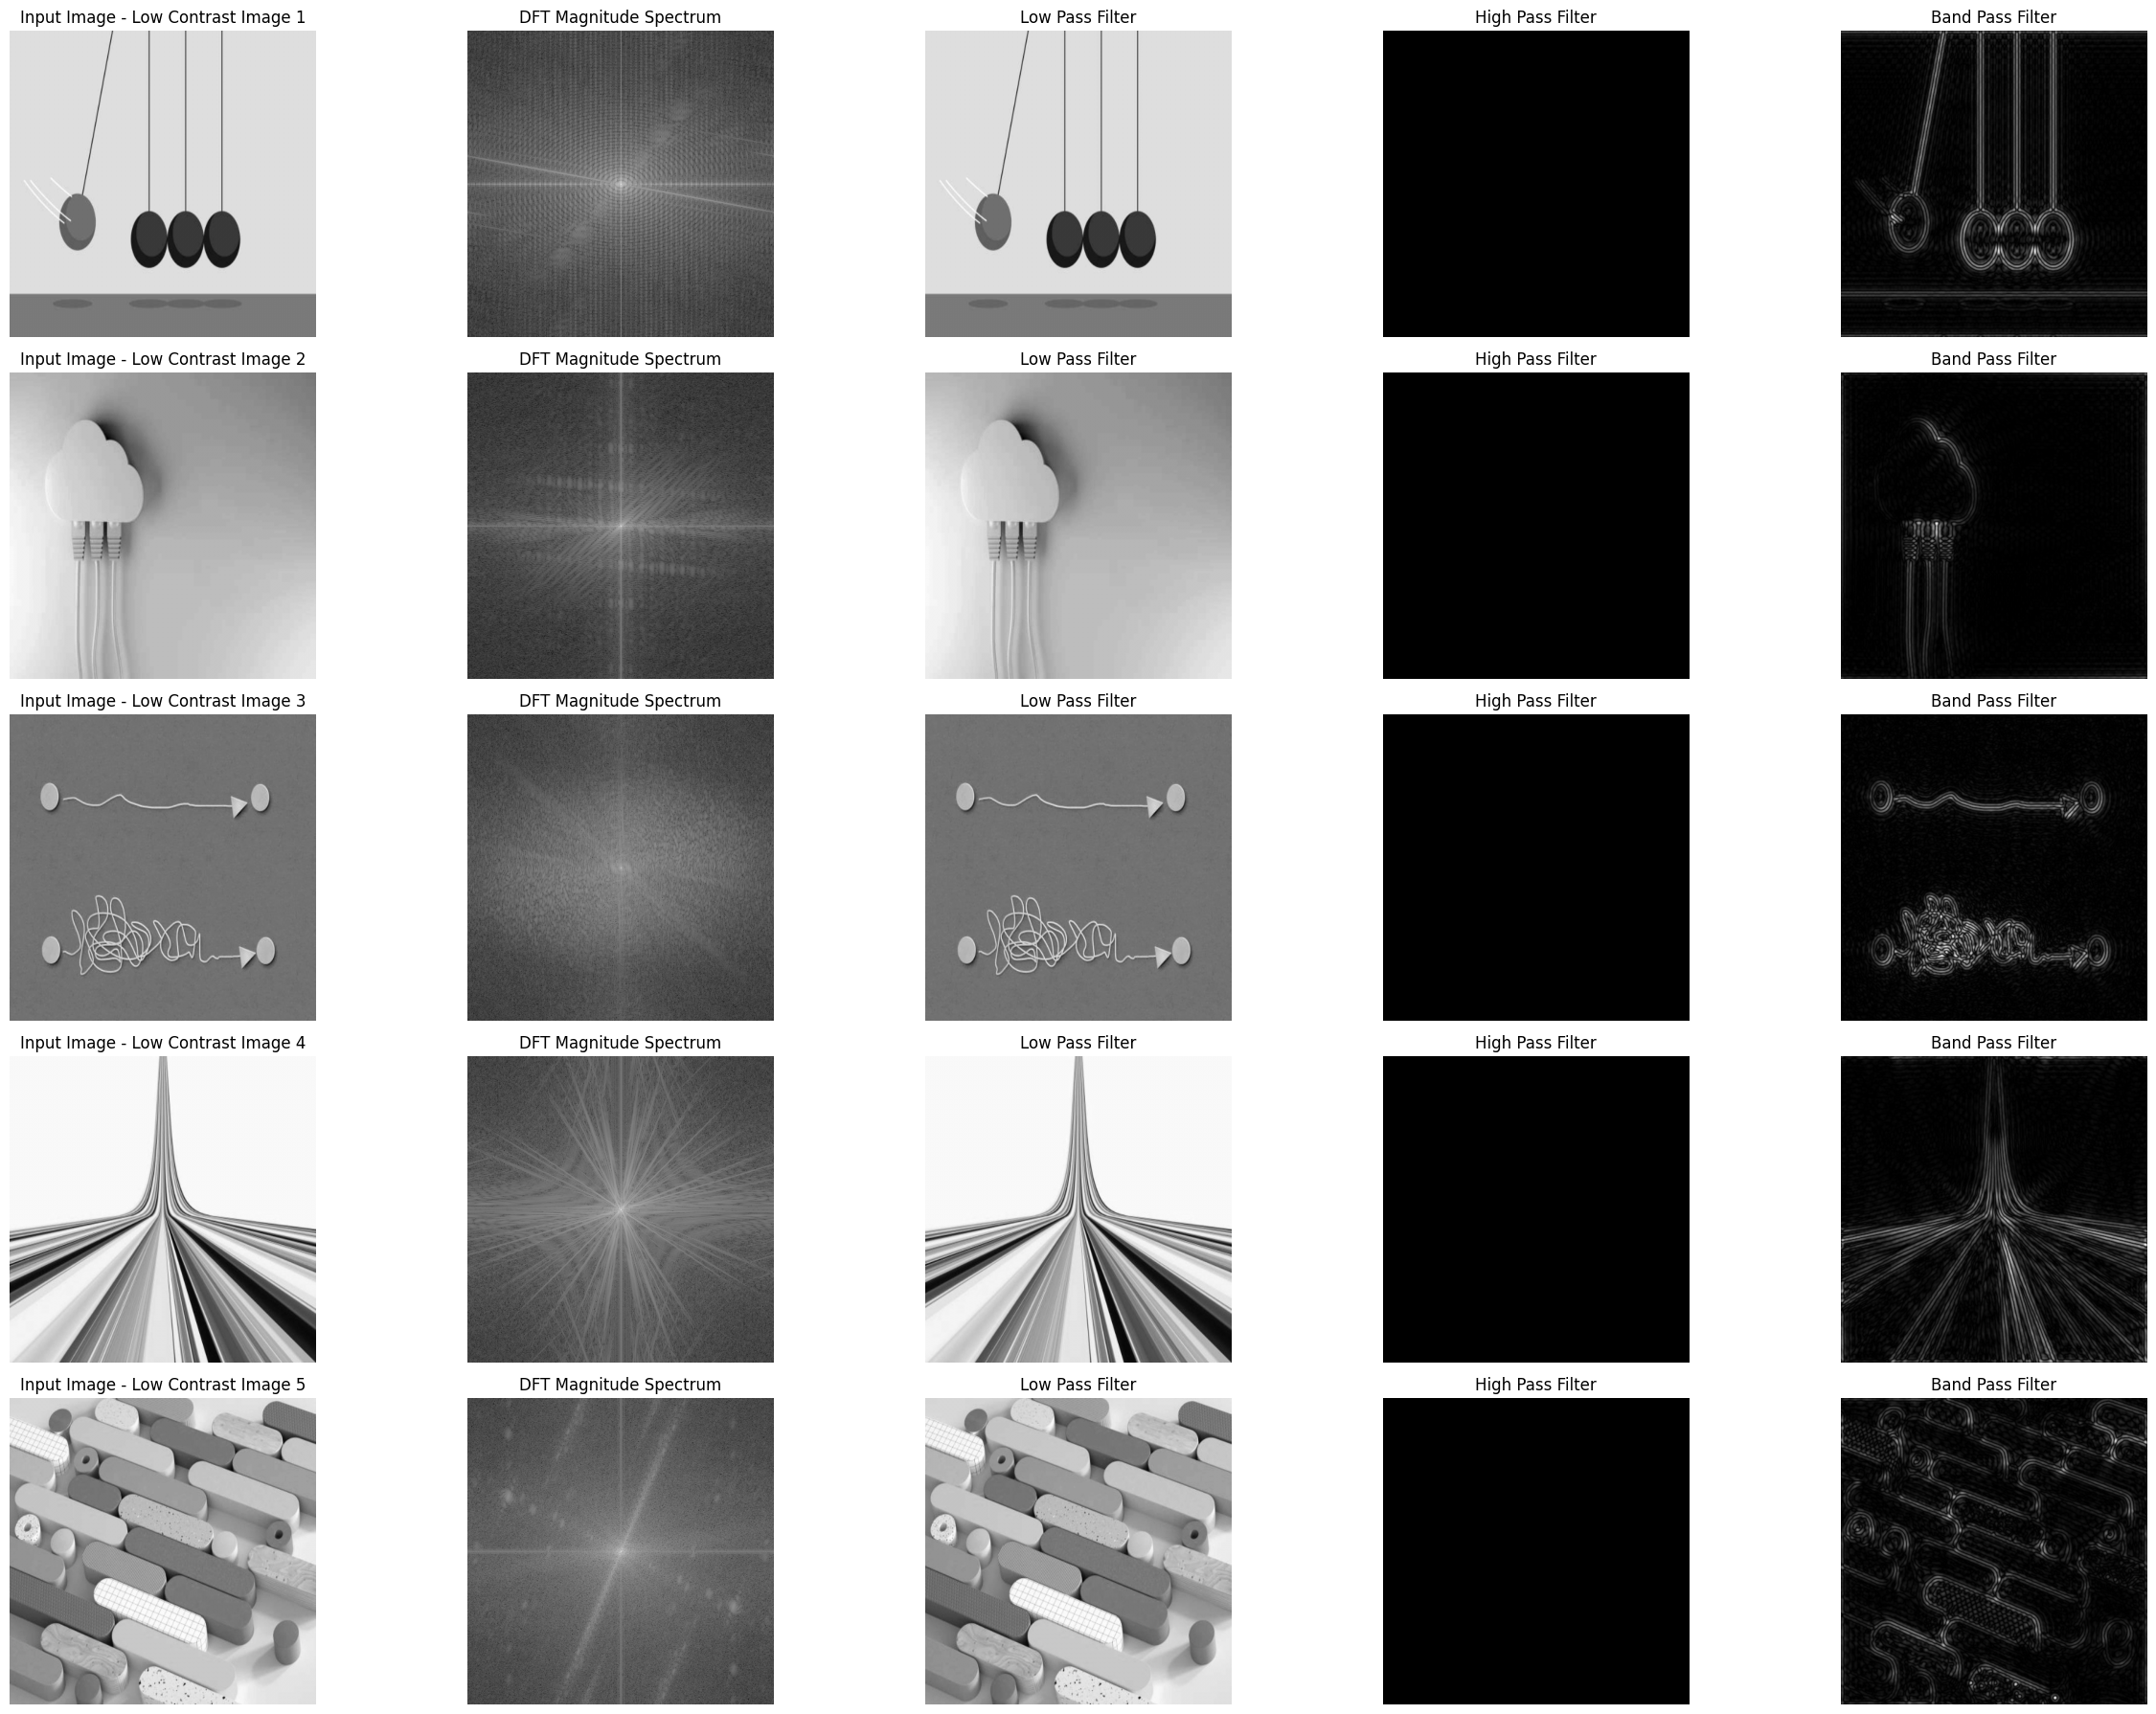

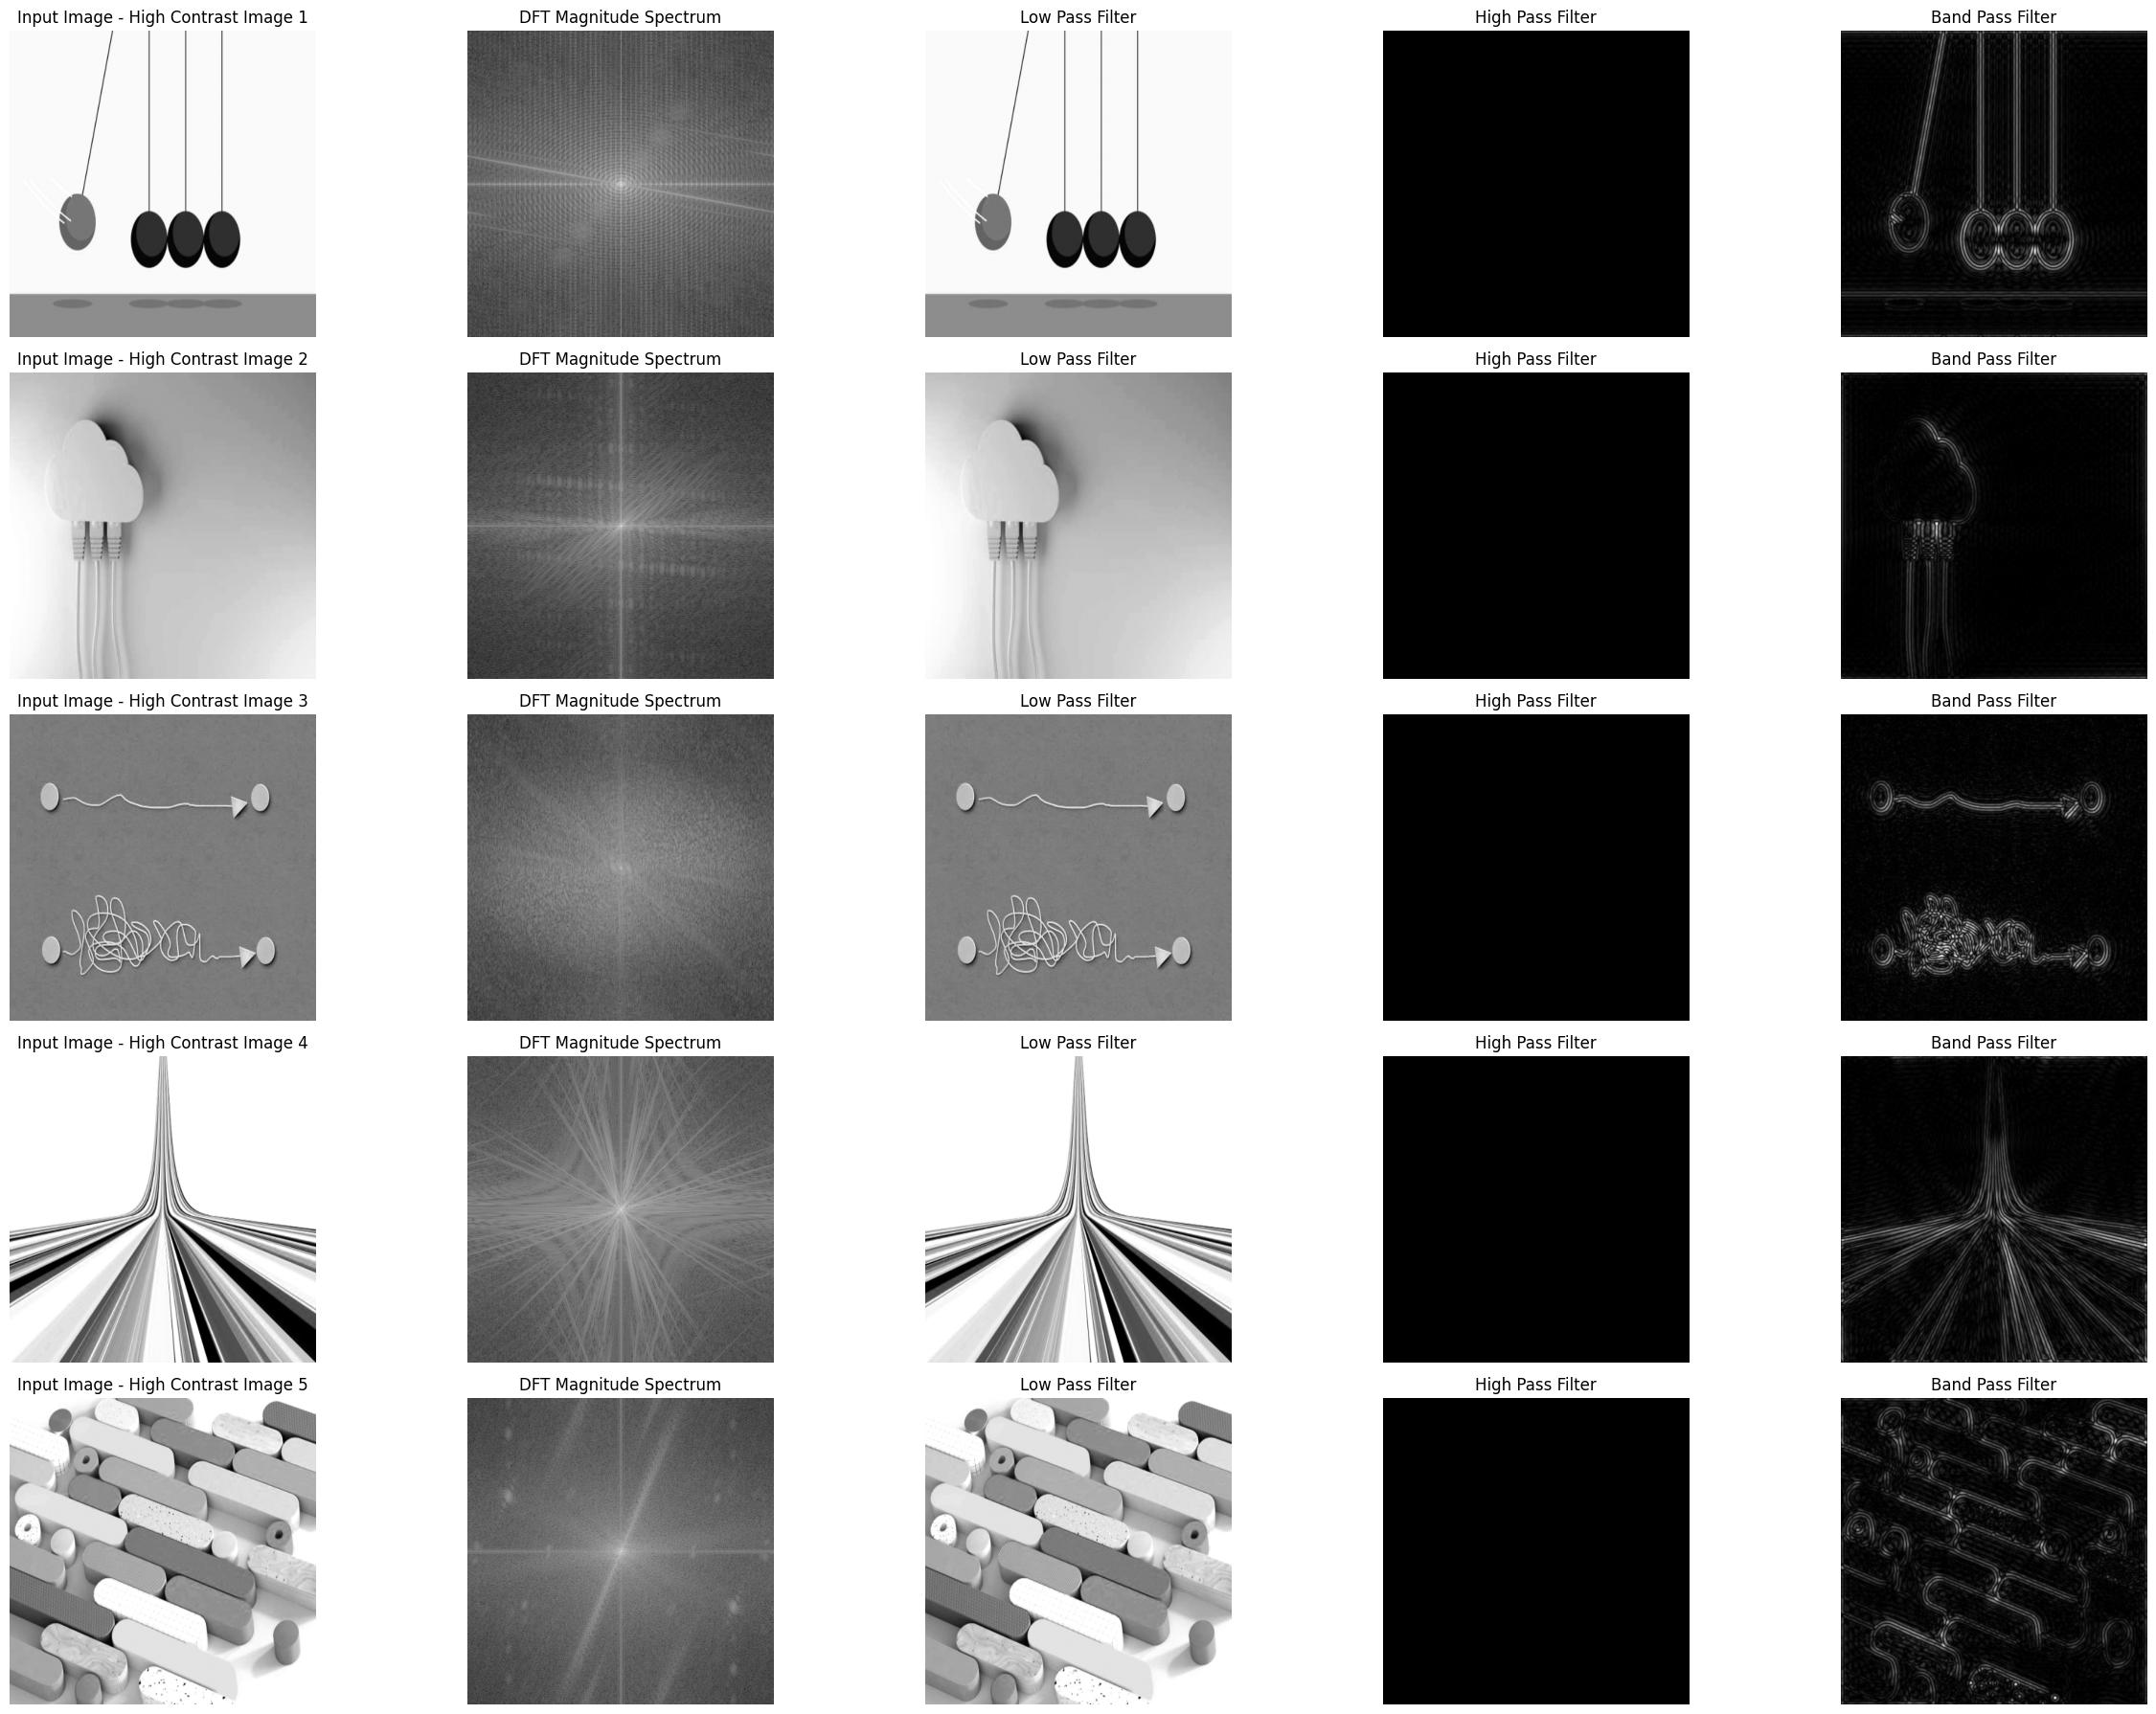

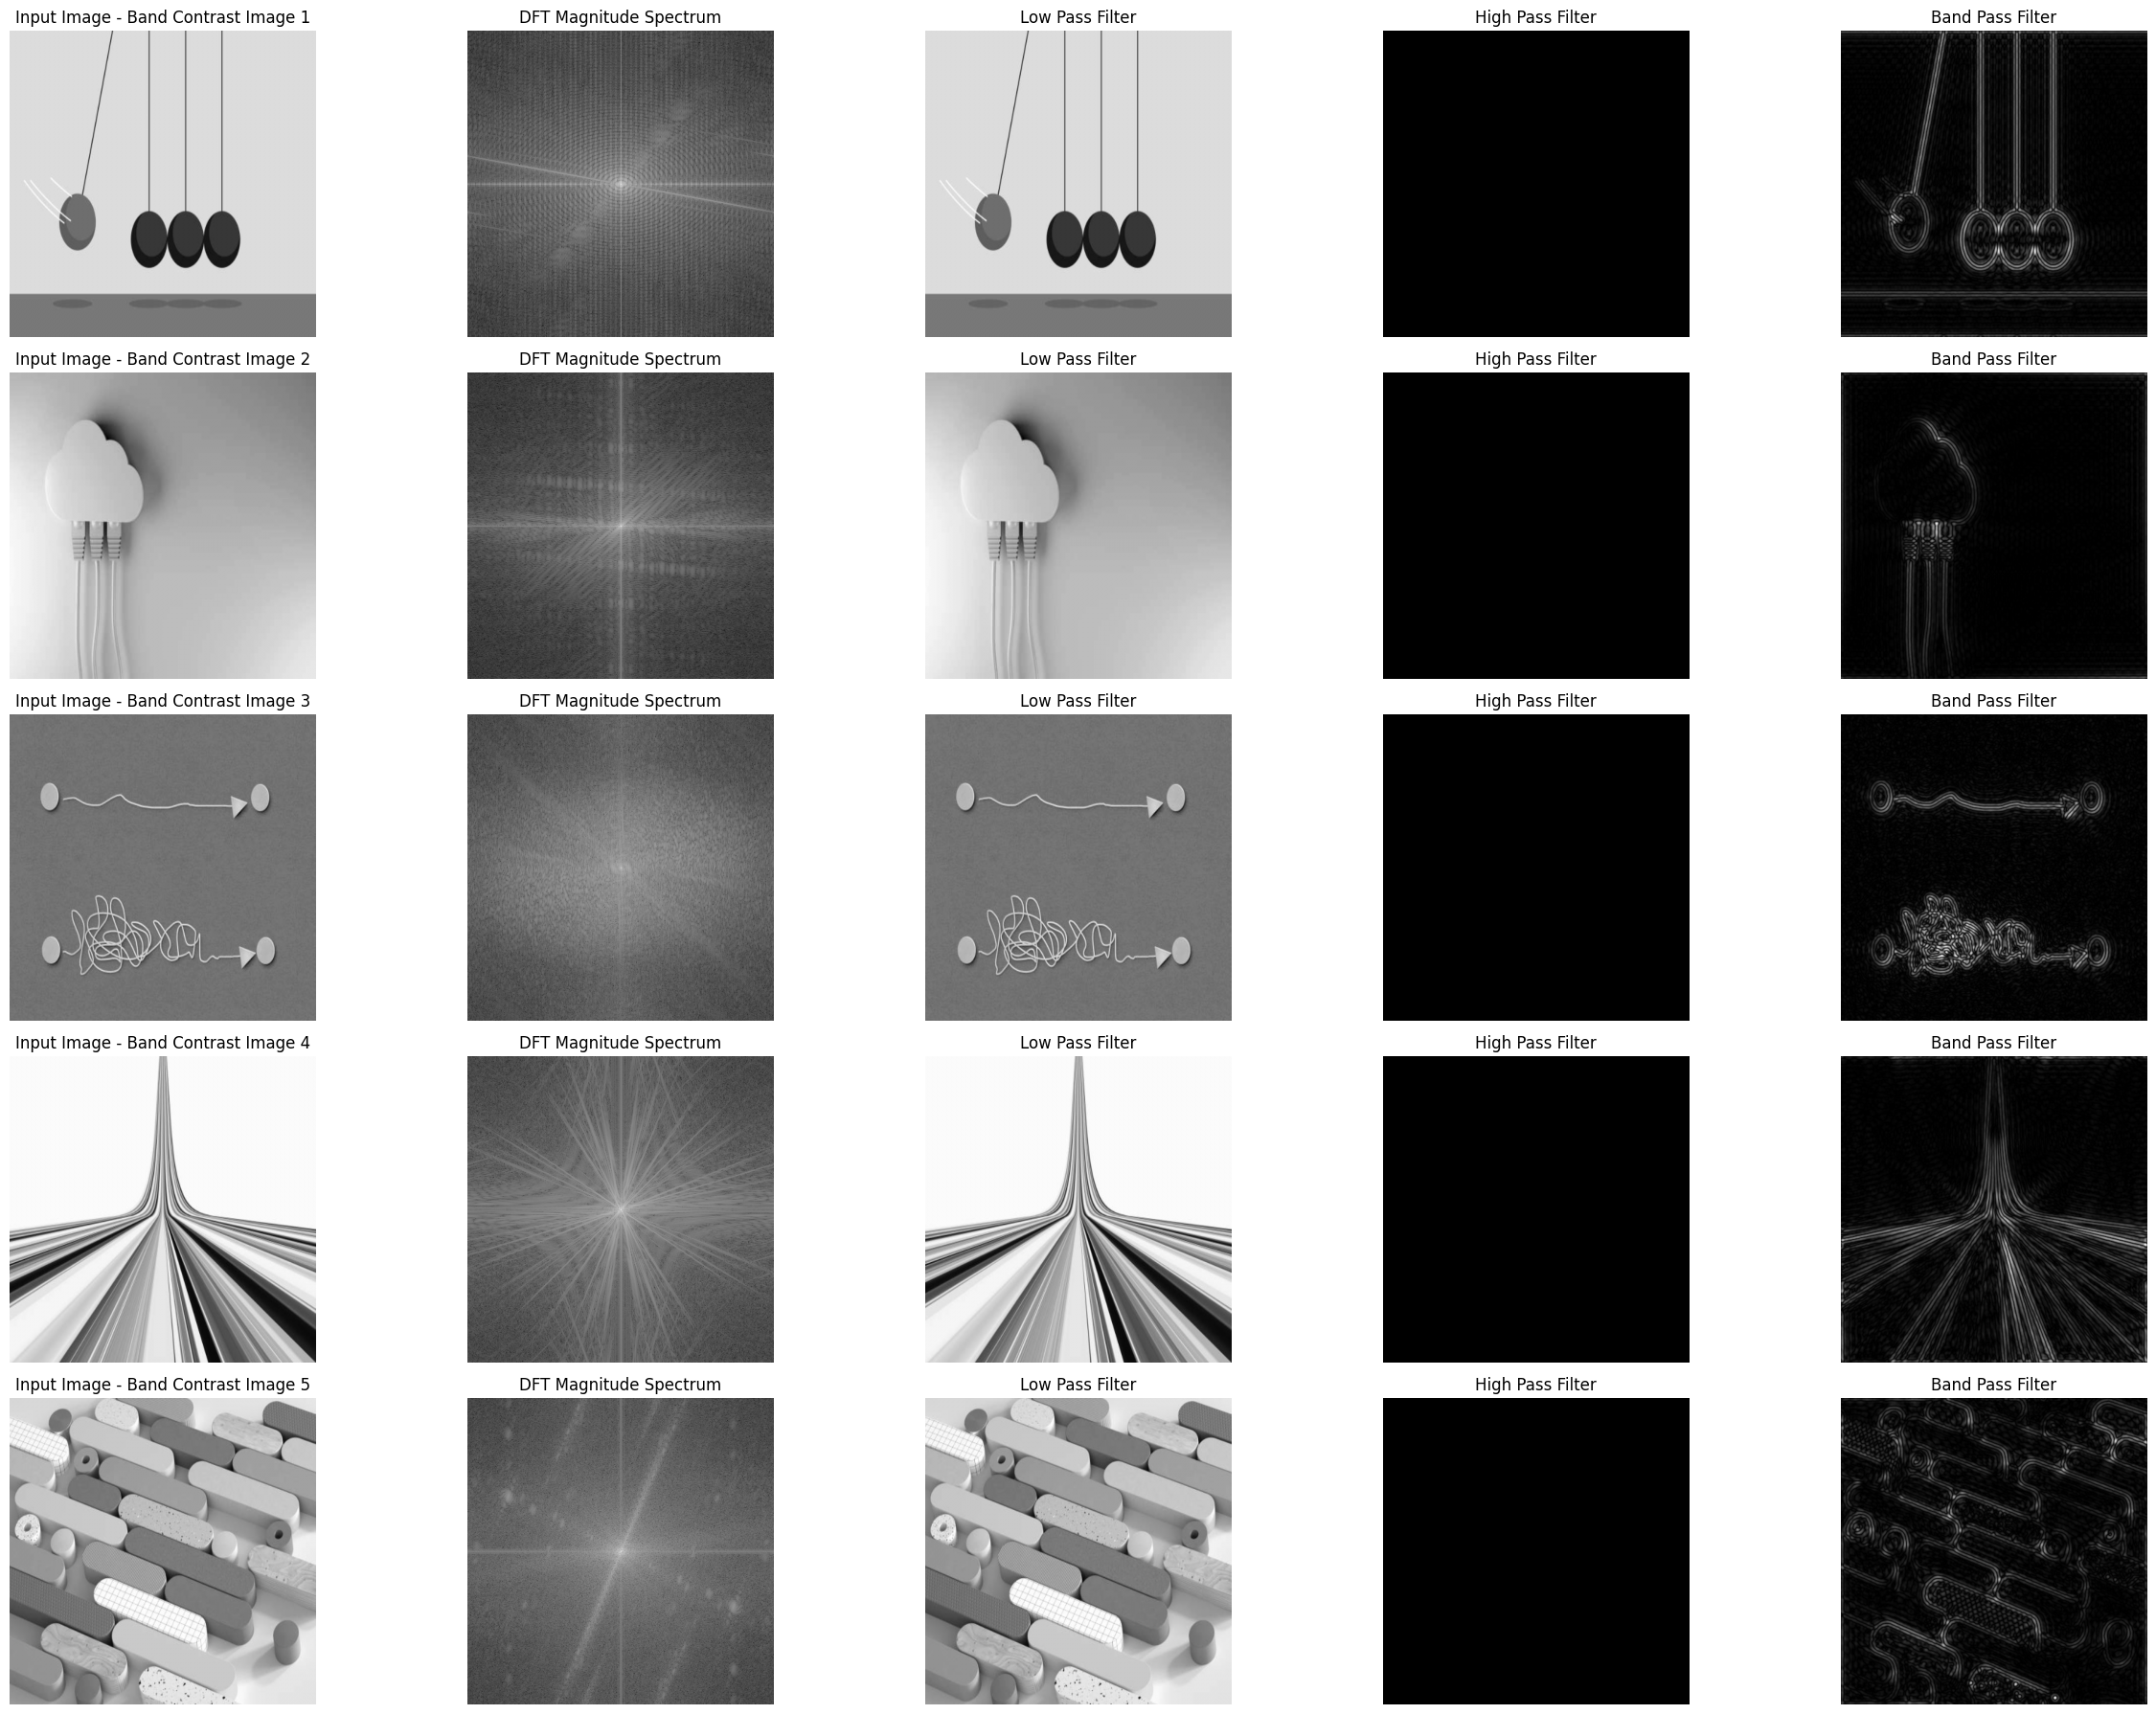

In [288]:
if __name__ == "__main__":  
    main()